In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tr = pd.read_csv('Transaction.csv')
nc = pd.read_csv('NewCustomer.csv')
cd = pd.read_csv('CustomerDemographic.csv')
ca = pd.read_csv('CustomerAddress.csv')

In [ ]:
tr = pd.read_csv('Transaction.csv')

In [ ]:
ca.shape

(3999, 7)

In [ ]:
#merge cd and ca on customer_id
cmerged = pd.merge(cd, ca, on = ['customer_id'])

In [ ]:
cmerged.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,11,060 Morning Avenue,2016,NSW,Australia,10,69
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Y,16,6 Meadow Vale Court,2153,NSW,Australia,10,42
2,4,Talbot,Talbot,M,33,1961-10-03,Senior Editor,IT,Mass Customer,N,N,7,0 Holy Cross Court,4211,QLD,Australia,9,61
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Retail,Affluent Customer,N,Y,8,17979 Del Mar Point,2448,NSW,Australia,4,46
4,6,Curr,Duckhouse,M,35,1966-09-16,Media Manager I,Retail,High Net Worth,N,Y,13,9 Oakridge Court,3216,VIC,Australia,9,56


In [ ]:
#convert DOB to datetimem format
cmerged['DOB'] = pd.to_datetime(cmerged['DOB'])

In [ ]:
#drop unnamed column
cmerged = cmerged.drop(cmerged.columns[[0,13]], axis = 1)

In [ ]:
#fill the null value in job_industry_category
cmerged['job_industry_category'] = cmerged['job_industry_category'].ffill(axis = 'rows')

In [ ]:
cmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3994
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3995 non-null   int64         
 1   first_name                           3995 non-null   object        
 2   last_name                            3995 non-null   object        
 3   gender                               3995 non-null   object        
 4   past_3_years_bike_related_purchases  3995 non-null   int64         
 5   DOB                                  3995 non-null   datetime64[ns]
 6   job_title                            3995 non-null   object        
 7   job_industry_category                3995 non-null   object        
 8   wealth_segment                       3995 non-null   object        
 9   deceased_indicator                   3995 non-null   object        
 10  owns_car    

In [ ]:
cmerged.isnull().sum()

In [ ]:
#adding age column
now = pd.Timestamp('now')
cmerged['DOB'] = cmerged['DOB'].where(cmerged['DOB'] < now, cmerged['DOB'] -  np.timedelta64(100, 'Y'))
cmerged['age'] = (now - cmerged['DOB']).astype('<m8[Y]')
print(cmerged)

In [ ]:
#convert age to int format
cmerged['age'] = cmerged['age'].astype(int)

In [ ]:
cmerged.duplicated().sum()

0

In [ ]:
tr['margin'] = tr['list_price'] - tr['standard_cost']

In [ ]:
#drop unnamed column
tr = tr.drop(tr.columns[[0]], axis = 1)

In [ ]:
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,month_transaction
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,2
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,5
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,10
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,8
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82,10


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    20000 non-null  object 
 7   product_line             20000 non-null  object 
 8   product_class            20000 non-null  object 
 9   product_size             20000 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  object 
 13  margin                   20000 non-null  float64
dtypes: float64(4), int64(3

In [ ]:
tr['online_order'] = tr['online_order'].astype(int)

In [ ]:
#convert tr date to datetime format
tr['transaction_date'] = pd.to_datetime(tr['transaction_date'])
tr['month_transaction'] = tr['transaction_date'].dt.month

In [ ]:
tr.duplicated().sum()

0

In [ ]:
trcust = pd.merge(cmerged, tr, on = 'customer_id')

In [ ]:
trcust = trcust.sort_values(by = ['customer_id', 'transaction_id'])

In [ ]:
trcust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,month_transaction
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,12
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,4
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,5
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,1
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,2


In [ ]:
trcust['deceased_indicator'] = trcust['deceased_indicator'].replace(['Y', 'N'], ['1', '0'])
trcust['owns_car'] = trcust['owns_car'].replace(['Y', 'N'], ['1', '0'])

In [ ]:
from pandas.core.window.expanding import Axis
hasil = pd.DataFrame(data=trcust)
file_name = "Merged_All.xlsx"
hasil.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
trcust = pd.read_csv('Merged_All.csv')

In [ ]:
trcust[trcust['order_status']=='Cancelled']

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,month_transaction
168,168,33,Ernst,Hacon,M,44,1957-06-25,Product Engineer,IT,Affluent Customer,...,Cancelled,Solex,Standard,medium,medium,575.27,431.45,1993-07-15,143.82,7
209,209,41,Basilius,Coupe,M,64,1976-04-14,Food Chemist,Health,Mass Customer,...,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22,167.21,8
364,364,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,...,Cancelled,Solex,Standard,low,medium,1289.85,74.51,2007-12-11,1215.34,6
624,624,113,Gage,Nickless,M,67,1956-05-06,Staff Scientist,Entertainment,Mass Customer,...,Cancelled,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-10,129.01,1
695,695,125,Darrelle,Antoniewski,F,94,1960-03-17,Computer Systems Analyst II,Property,Mass Customer,...,Cancelled,Giant Bicycles,Standard,medium,large,569.56,528.43,2003-09-10,41.13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18776,18776,3286,Kent,Hatter,M,23,1961-06-02,Assistant Media Planner,Entertainment,Mass Customer,...,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,1999-12-04,502.47,1
19431,19431,3404,Thomasine,McCloch,F,2,1973-08-01,GIS Technical Architect,Property,Affluent Customer,...,Cancelled,Solex,Standard,high,medium,748.17,448.90,1991-11-10,299.27,2
19742,19742,3460,Reinhold,Barthrup,M,22,1999-10-10,Actuary,Financial Services,Mass Customer,...,Cancelled,Solex,Standard,high,large,1842.92,1105.75,1995-10-24,737.17,11
19776,19776,3465,Hadria,Pizer,F,71,1978-02-01,Chemical Engineer,Manufacturing,High Net Worth,...,Cancelled,Solex,Standard,medium,large,1071.23,380.74,1996-04-05,690.49,7


In [ ]:
trcust = trcust[trcust['order_status']!='Cancelled']

In [ ]:
trcust = trcust.drop(trcust.columns[[0]], axis = 1)

In [ ]:
trcust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,month_transaction
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,12
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,4
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,5
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,1
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,2


In [ ]:
tr['number_transaction'] = tr.groupby(['month_transaction'])[['customer_id']].count()
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,month_transaction,number_transaction
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,2,NaN
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,5,1682.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,10,1623.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,8,1656.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82,10,1655.0


In [ ]:
transaction_per_month = trcust.groupby(['month_transaction'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_transaction']
transaction_per_month

,month,number_transaction
0,1,1666
1,2,1615
2,3,1640
3,4,1633
4,5,1665
5,6,1559
6,7,1699
7,8,1729
8,9,1551
9,10,1753


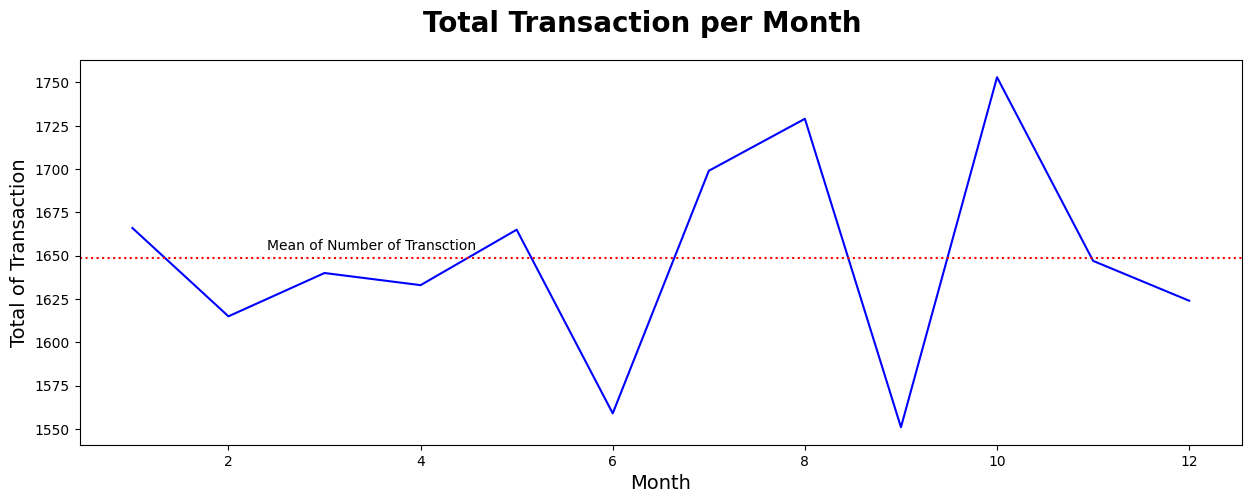

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = transaction_per_month['month']
y = transaction_per_month['number_transaction']
mean = y.mean()

fig = plt.figure(figsize=(15, 5))

fig.suptitle('Total Transaction per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total of Transaction', fontsize=14)

plt.plot(x, y, color = 'blue')
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean of Number of Transction', transform=fig.transFigure, color='black')
plt.show()

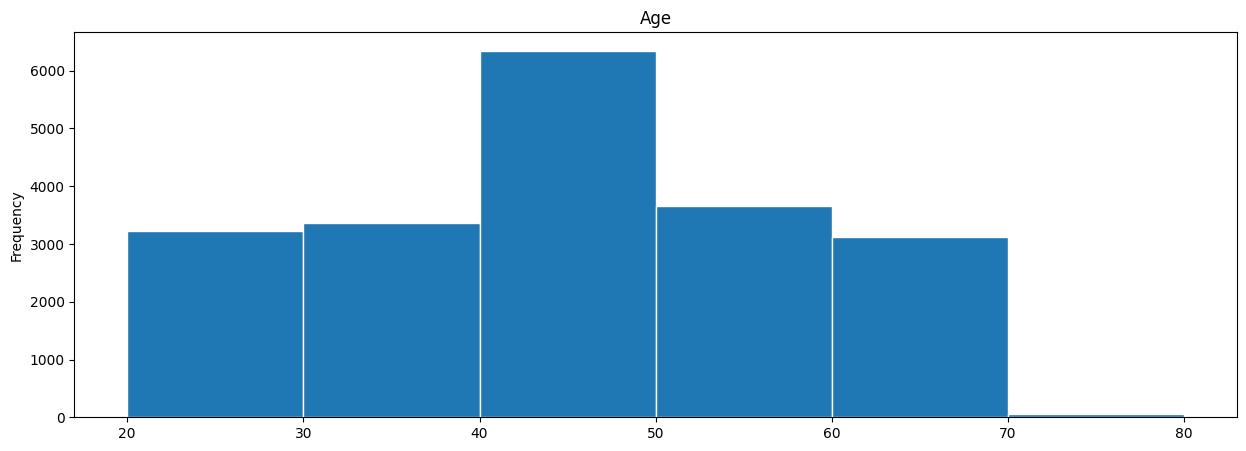

In [ ]:
plt.figure(figsize = (15,5))
ax = plt.hist(x='age', data=trcust, bins=[20,30,40,50,60,70,80], edgecolor = 'white')
#plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Age')
plt.ylabel('Frequency')
#plt.savefig('job_industry-gender_original.png')
plt.show()

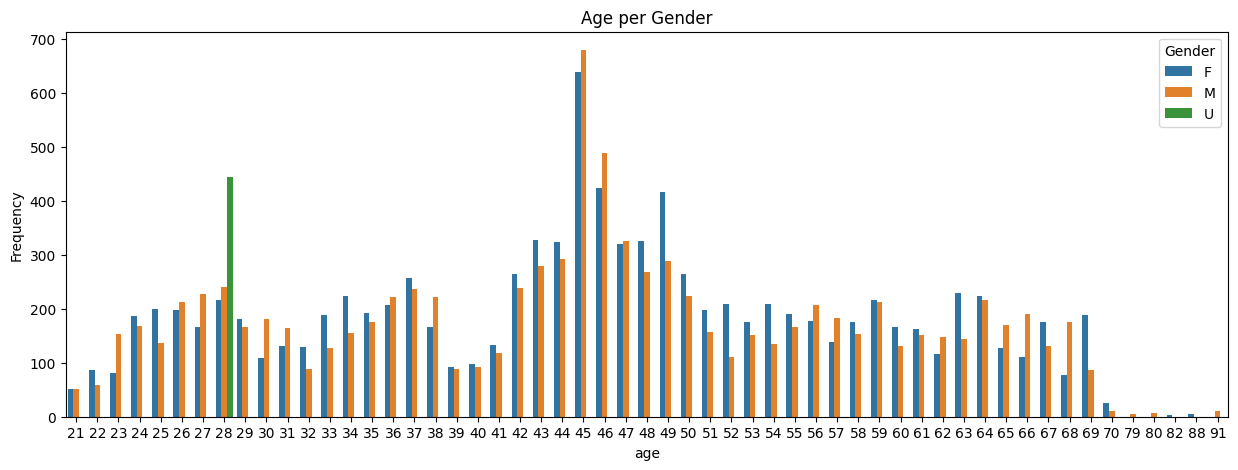

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x='age', data=trcust, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Age per Gender')
plt.ylabel('Frequency')
#plt.savefig('job_industry-gender_original.png')
plt.show()

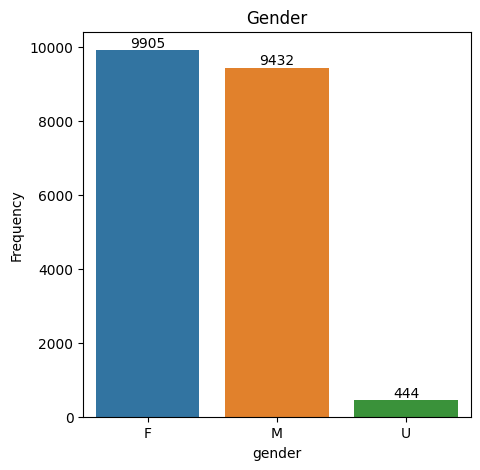

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x='gender', data=trcust)
for container in ax.containers:
    ax.bar_label(container,)
plt.title('Gender')
plt.ylabel('Frequency')
plt.show()

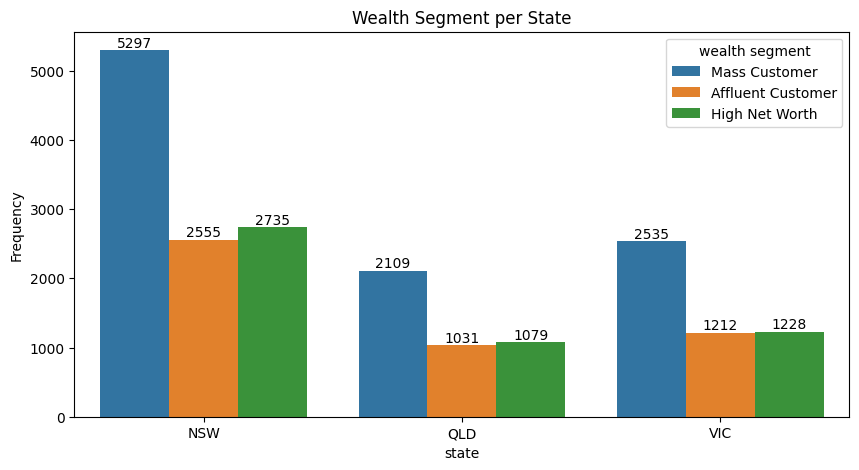

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='state', data=trcust, hue='wealth_segment')
plt.legend(title='wealth segment', loc='upper right', fancybox=True)
for container in ax.containers:
    ax.bar_label(container,)
plt.title('Wealth Segment per State')
plt.ylabel('Frequency')
plt.show()

In [ ]:
wealth = trcust.groupby(['state', 'wealth_segment'])['state'].count()
wealth = wealth.reset_index(name='total')
wealth['percentage'] =  (100 * wealth['total'] / wealth.groupby('state')['total'].transform('sum')).round(2)

pvt = wealth.pivot_table(columns='state', index='wealth_segment', values=['total', 'percentage'])
pvt.fillna(0)

percentage               total            
state                    NSW    QLD    VIC   NSW   QLD   VIC
wealth_segment                                              
Affluent Customer      24.13  24.44  24.36  2555  1031  1212
High Net Worth         25.83  25.57  24.68  2735  1079  1228
Mass Customer          50.03  49.99  50.95  5297  2109  2535

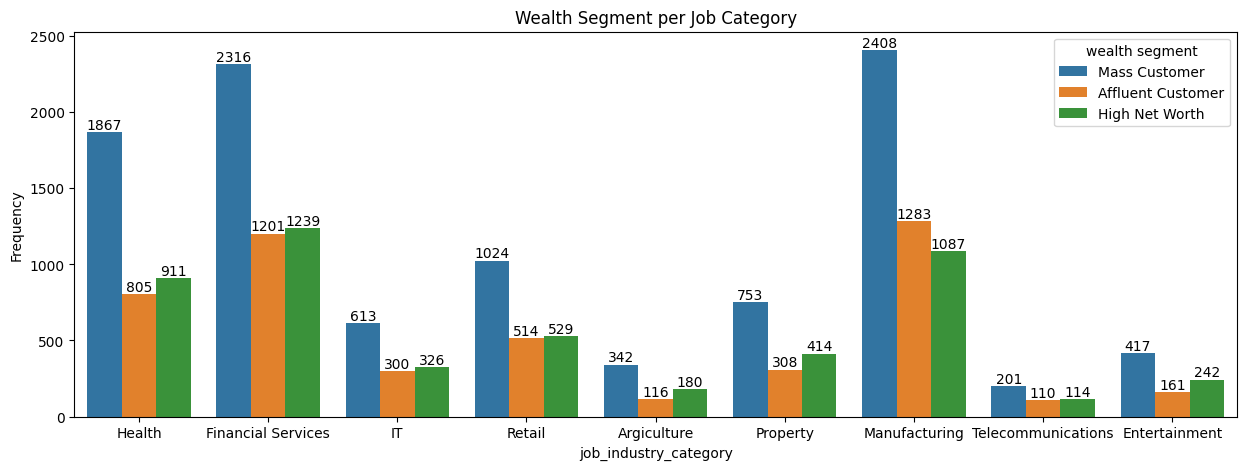

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x='job_industry_category', data=trcust, hue='wealth_segment')
for container in ax.containers:
    ax.bar_label(container,)
plt.legend(title='wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment per Job Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bikes = trcust.groupby(['state', 'brand'])['brand'].count()
bikes = bikes.reset_index(name='total')
bikes['percentage'] =  (100 * bikes['total'] / bikes.groupby('state')['total'].transform('sum')).round(2)

pvt = bikes.pivot_table(columns='brand', index='state', values=['total', 'percentage'])
pvt.fillna(0)

percentage                                                          \
brand Giant Bicycles Norco Bicycles OHM Cycles  Solex Trek Bicycles WeareA2B   
state                                                                          
NSW            16.39          15.00      15.72  21.37         15.01    16.52   
QLD            16.92          14.91      15.48  21.28         14.67    16.73   
VIC            17.13          13.83      14.59  21.91         15.76    16.78   

               total                                                         
brand Giant Bicycles Norco Bicycles OHM Cycles Solex Trek Bicycles WeareA2B  
state                                                                        
NSW             1735           1588       1664  2262          1589     1749  
QLD              714            629        653   898           619      706  
VIC              852            688        726  1090           784      835

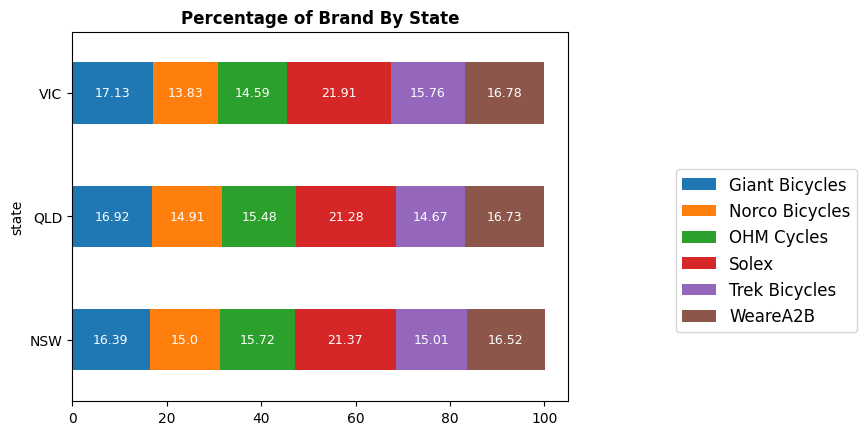

In [ ]:
pvt_count = bikes.pivot_table(index='state', columns='brand', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Brand By State', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')

plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

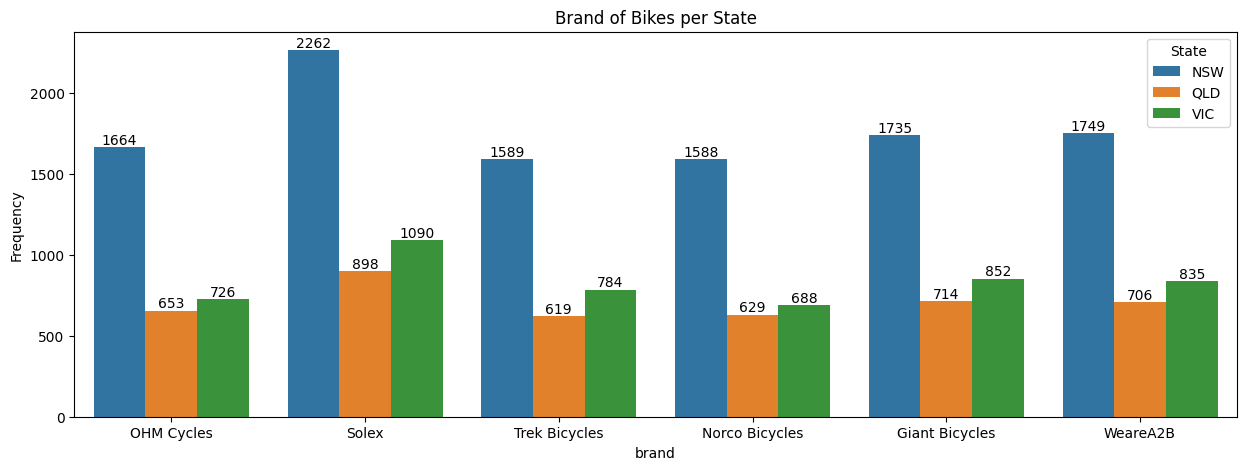

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x='brand', data=trcust, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
for container in ax.containers:
    ax.bar_label(container,)
plt.title('Brand of Bikes per State')
plt.ylabel('Frequency')
plt.show()

In [ ]:
rank = trcust[['product_line', 'product_class', 'product_size']].describe().T
rank['%'] = rank['freq']/rank['count']*100
rank

,count,unique,top,freq,%
product_line,19781,4,Standard,14155,71.558566
product_class,19781,3,medium,13803,69.779081
product_size,19781,3,medium,12971,65.573025


#RFM

In [ ]:
rfm = trcust.copy()

In [ ]:
rfm['transaction_date'] = pd.to_datetime(rfm['transaction_date'])
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19781 entries, 0 to 19958
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19781 non-null  int64         
 1   first_name                           19781 non-null  object        
 2   last_name                            19781 non-null  object        
 3   gender                               19781 non-null  object        
 4   past_3_years_bike_related_purchases  19781 non-null  int64         
 5   DOB                                  19781 non-null  object        
 6   job_title                            19781 non-null  object        
 7   job_industry_category                19781 non-null  object        
 8   wealth_segment                       19781 non-null  object        
 9   deceased_indicator                   19781 non-null  int64         
 10  owns_car  

In [ ]:
now = dt.datetime(2017,12,30)
now

datetime.datetime(2017, 12, 30, 0, 0)

In [ ]:
rfm_data = rfm.groupby('customer_id').agg({'transaction_date' : lambda x: (now - x.max()).days,
                               'customer_id': lambda a : len(a),
                              'margin': lambda a : a.sum()
                             })
rfm_data.rename(columns={'transaction_date': 'recency',
                          'customer_id': 'frequency',
                          'margin': 'monetary'}, inplace=True)
rfm_data

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [ ]:
#ranking the rfm
rfm_data['R'] = pd.qcut(rfm_data["recency"],5,labels=[5,4,3,2,1]) #dibalik krn angka r kecil berarti dia baru beli
rfm_data['F'] = pd.qcut(rfm_data["frequency"],5,labels=[1,2,3,4,5])
rfm_data['M'] = pd.qcut(rfm_data["monetary"],5,labels=[1,2,3,4,5])
rfm_data["RFM_Acc"] = rfm_data["R"].astype(str) +rfm_data["F"].astype(str) + rfm_data["M"].astype(str)
rfm_data["RFM_Score"] = ((rfm_data["R"].astype('int64') +rfm_data["F"].astype('int64') + rfm_data["M"].astype('int64')) /3).round(2)
rfm_data

,recency,frequency,monetary,R,F,M,RFM_Acc,RFM_Score
customer_id,,,,,,,,
1,7,11,3018.09,5,5,3,553,4.33
2,128,3,2226.26,1,1,2,112,1.33
4,195,2,220.57,1,1,1,111,1.00
5,16,6,2394.94,4,3,2,432,3.00
6,64,5,3946.55,2,2,4,224,2.67
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,1.33
3497,52,3,1648.32,3,1,2,312,2.00
3498,127,6,3147.33,1,3,3,133,2.33


In [ ]:
#segmentation
rfm_data["customer_segment"] = np.where(rfm_data['RFM_Score'] > 4, "Top Customers",
                                        (np.where(rfm_data['RFM_Score'] > 3,"High value Customer",
                                        (np.where(rfm_data['RFM_Score'] > 2,"Medium Value Customer",
                                        np.where(rfm_data['RFM_Score'] > 1,"Low Value Customers",
                                        "Lost Customers"))))))

In [ ]:
rfm_data.sample(5)

,recency,frequency,monetary,R,F,M,RFM_Acc,RFM_Score,customer_segment
customer_id,,,,,,,,,
1551,22,7,5171.89,4,4,5,445,4.33,Top Customers
1232,4,9,5011.90,5,5,5,555,5.00,Top Customers
2059,170,4,1500.24,1,1,1,111,1.00,Lost Customers
246,27,9,3174.16,4,5,3,453,4.00,High value Customer
2100,18,5,2399.56,4,2,2,422,2.67,Medium Value Customer


In [ ]:
cd = pd.read_csv('CustomerDemographic.csv')
ca = pd.read_csv('CustomerAddress.csv')
cd1 = cd.copy()
ca1 = ca.copy()
cd1 = cd1.drop(['Unnamed: 0'], axis = 1)
ca1 = ca1.drop(['Unnamed: 0'], axis = 1)
cust = pd.merge(ca1, cd1, on = 'customer_id')
cust.head()

#rfm_cust = pd.merge(rfm_data, cd1, ca1, on = 'customer_id')
#rfm_cust.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,11
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Y,16
2,4,0 Holy Cross Court,4211,QLD,Australia,9,Talbot,Talbot,M,33,1961-10-03,Senior Editor,IT,Mass Customer,N,N,7
3,5,17979 Del Mar Point,2448,NSW,Australia,4,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Retail,Affluent Customer,N,Y,8
4,6,9 Oakridge Court,3216,VIC,Australia,9,Curr,Duckhouse,M,35,1966-09-16,Media Manager I,Retail,High Net Worth,N,Y,13


In [ ]:
rfm_cust = pd.merge(cust, rfm_data, on = 'customer_id')
rfm_cust.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,tenure,recency,frequency,monetary,R,F,M,RFM_Acc,RFM_Score,customer_segment
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,F,93,...,11,7,11,3018.09,5,5,3,553,4.33,Top Customers
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,Eli,Bockman,M,81,...,16,128,3,2226.26,1,1,2,112,1.33,Low Value Customers
2,4,0 Holy Cross Court,4211,QLD,Australia,9,Talbot,Talbot,M,33,...,7,195,2,220.57,1,1,1,111,1.00,Lost Customers
3,5,17979 Del Mar Point,2448,NSW,Australia,4,Sheila-kathryn,Calton,F,56,...,8,16,6,2394.94,4,3,2,432,3.00,Medium Value Customer
4,6,9 Oakridge Court,3216,VIC,Australia,9,Curr,Duckhouse,M,35,...,13,64,5,3946.55,2,2,4,224,2.67,Medium Value Customer


#Analysis

In [ ]:
#adding age column
#convert DOB to datetimem format
rfm_cust['DOB'] = pd.to_datetime(rfm_cust['DOB'])
now = pd.Timestamp('now')
rfm_cust['DOB'] = rfm_cust['DOB'].where(rfm_cust['DOB'] < now, rfm_cust['DOB'] -  np.timedelta64(100, 'Y'))
rfm_cust['age'] = (now - rfm_cust['DOB']).astype('<m8[Y]')
print(rfm_cust)
rfm_cust['age'] = rfm_cust['age'].astype(int)

In [ ]:
rfm_cust.info()

In [ ]:
seg_job = rfm_cust.groupby(['customer_segment', 'job_industry_category'])['customer_segment'].count()
seg_job = seg_job.reset_index(name='total')
seg_job['percentage'] =  (100 * seg_job['total'] / seg_job.groupby('customer_segment')['total'].transform('sum')).round(2)

pvt = seg_job.pivot_table(columns='job_industry_category', index='customer_segment', values=['total', 'percentage'])
pvt.fillna(0)

percentage                                          \
job_industry_category Argiculture Entertainment Financial Services Health   
customer_segment                                                            
High value Customer          2.96          4.44              23.78  16.38   
Lost Customers               2.18          6.99              24.45  20.96   
Low Value Customers          3.17          4.70              25.00  16.12   
Medium Value Customer        3.72          2.84              21.65  19.49   
Top Customers                3.18          4.37              27.63  19.48   

                                                                              \
job_industry_category    IT Manufacturing Property Retail Telecommunications   
customer_segment                                                               
High value Customer    5.39         25.58     7.82  10.99               2.64   
Lost Customers         4.80         21.83     3.49  11.79               3.49   
Low Value Customers    6.85         24.49     9.14   9.01               1.52   
Medium Value Customer  5.97         26.05     8.03   9.89               2.35   
Top Customers          7.95         18.89     6.36  10.93               1.19   

                            total                                              \
job_industry_category Argiculture Entertainment Financial Services Health  IT   
customer_segment                                                                
High value Customer            28            42                225    155  51   
Lost Customers                  5            16                 56     48  11   
Low Value Customers            25            37                197    127  54   
Medium Value Customer          38            29                221    199  61   
Top Customers                  16            22                139     98  40   

                                                                        
job_industry_category Manufacturing Property Retail Telecommunications  
customer_segment                                                        
High value Customer             242       74    104                 25  
Lost Customers                   50        8     27                  8  
Low Value Customers             193       72     71                 12  
Medium Value Customer           266       82    101                 24  
Top Customers                    95       32     55                  6

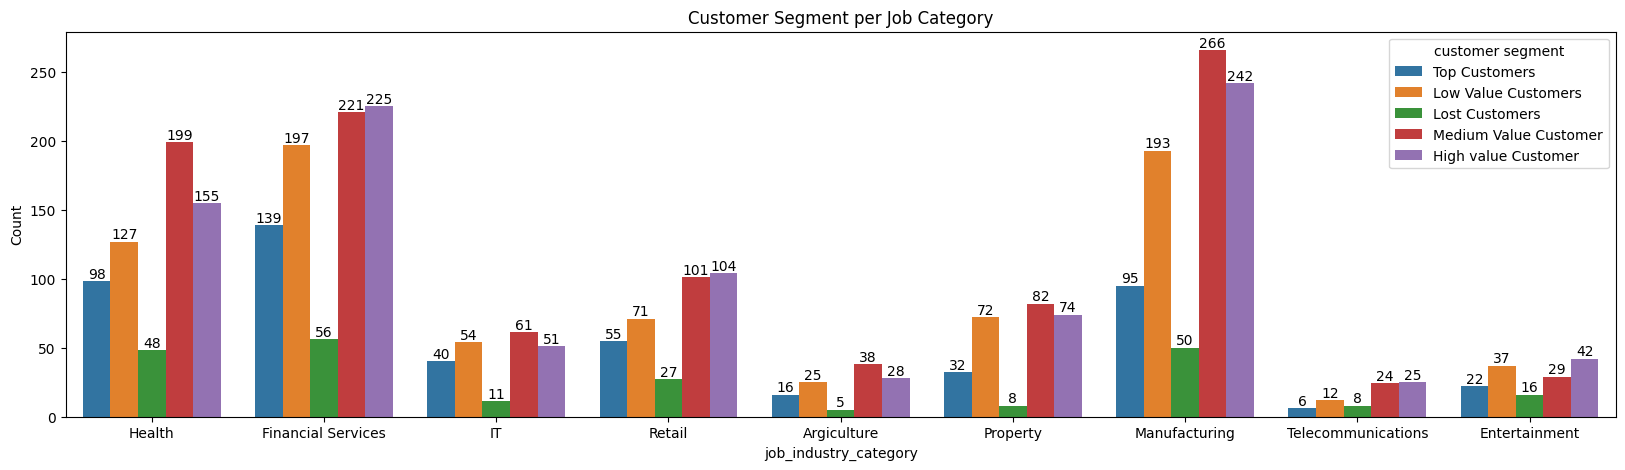

In [ ]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x='job_industry_category', data=rfm_cust, hue='customer_segment')
plt.legend(title='customer segment', loc='upper right', fancybox=True)
for container in ax.containers:
    ax.bar_label(container,)
plt.title('Customer Segment per Job Category')
plt.ylabel('Count')
#plt.savefig('job_industry-gender_original.png')
plt.show()

In [ ]:
seg_state = rfm_cust.groupby(['customer_segment', 'state'])['state'].count()
seg_state = seg_state.reset_index(name='total')
seg_state['percentage'] =  (100 * seg_state['total'] / seg_state.groupby('state')['total'].transform('sum')).round(2)

pvt = seg_state.pivot_table(columns='state', index='customer_segment', values=['total', 'percentage'])
pvt.fillna(0)

percentage               total          
state                        NSW    QLD    VIC   NSW  QLD  VIC
customer_segment                                              
High value Customer        27.94  27.09  25.45   521  201  224
Lost Customers              7.13   4.99   6.70   133   37   59
Low Value Customers        21.55  25.07  22.73   402  186  200
Medium Value Customer      29.01  28.17  30.80   541  209  271
Top Customers              14.37  14.69  14.32   268  109  126

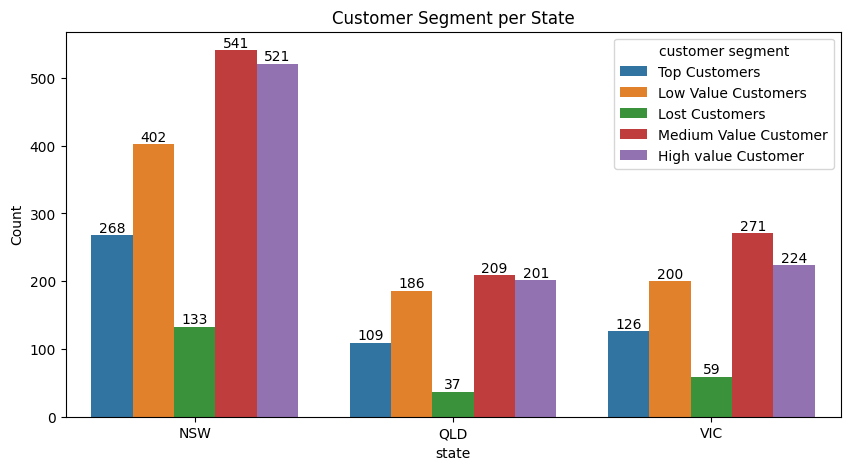

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='state', data=rfm_cust, hue='customer_segment')
plt.legend(title='customer segment', loc='upper right', fancybox=True)
for container in ax.containers:
    ax.bar_label(container,)
plt.title('Customer Segment per State')
plt.ylabel('Count')
#plt.savefig('job_industry-gender_original.png')
plt.show()

In [ ]:
seg_age = rfm_cust.groupby(['customer_segment', 'age'])['age'].count()
seg_age = seg_age.reset_index(name='total')
seg_age['percentage'] =  (100 * seg_age['total'] / seg_age.groupby('age')['total'].transform('sum')).round(2)

pvt = seg_age.pivot_table(columns='age', index='customer_segment', values=['total', 'percentage'])
pvt.fillna(0)

percentage                                            \
age                           21     22     23     24     25     26     27   
customer_segment                                                             
High value Customer        26.32  33.33  18.60  24.62  29.31  28.99  36.07   
Lost Customers              5.26   3.70   9.30  12.31   3.45   5.80   4.92   
Low Value Customers        21.05  37.04  18.60  18.46  20.69  27.54  14.75   
Medium Value Customer      36.84  18.52  34.88  27.69  31.03  18.84  22.95   
Top Customers              10.53   7.41  18.60  16.92  15.52  18.84  21.31   

                                            ... total                         \
age                       28     29     30  ...    66    67    68    69   70   
customer_segment                            ...                                
High value Customer    22.22  24.19  16.36  ...  11.0  17.0  15.0  17.0  1.0   
Lost Customers          5.23   8.06  10.91  ...   3.0   2.0   4.0   2.0  0.0   
Low Value Customers    23.53  29.03  21.82  ...  14.0  14.0  11.0   7.0  2.0   
Medium Value Customer  26.14  24.19  30.91  ...  11.0  19.0  14.0  13.0  2.0   
Top Customers          22.88  14.52  20.00  ...  11.0   5.0   4.0   7.0  1.0   

                                                
age                     79   80   82   88   91  
customer_segment                                
High value Customer    0.0  1.0  0.0  0.0  0.0  
Lost Customers         0.0  0.0  0.0  0.0  0.0  
Low Value Customers    0.0  0.0  1.0  1.0  0.0  
Medium Value Customer  1.0  0.0  0.0  0.0  0.0  
Top Customers          0.0  0.0  0.0  0.0  1.0  

[5 rows x 110 columns]

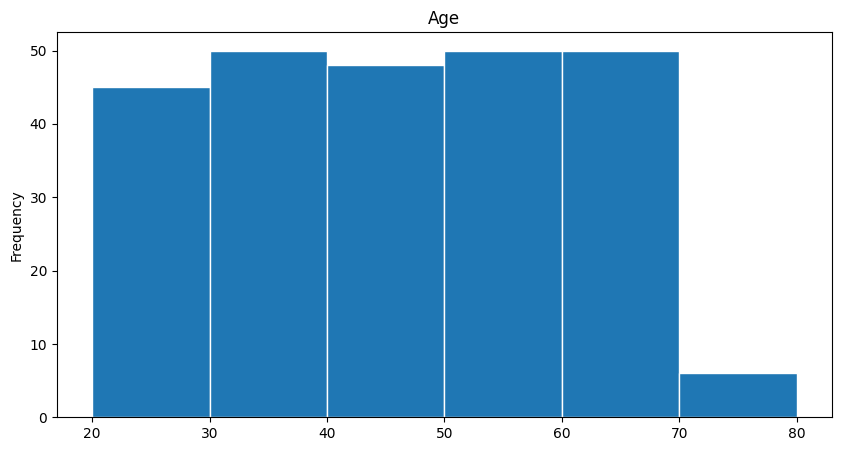

In [ ]:
plt.figure(figsize = (10,5))
ax = plt.hist(x='age', data=seg_age, bins=[20,30,40,50,60,70,80], edgecolor = 'white')
plt.title('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cust_target = rfm_cust[rfm_cust['customer_segment'] == 'Top Customers']

In [ ]:
cust_target.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_id,503.0,1737.78,1004.39,1.00,881.50,1745.00,2617.00,3495.00
postcode,503.0,2996.26,850.23,2000.00,2206.50,2767.00,3806.00,4883.00
property_valuation,503.0,7.48,2.79,1.00,6.00,8.00,9.00,12.00
past_3_years_bike_related_purchases,503.0,49.12,28.55,0.00,25.00,47.00,73.00,99.00
tenure,503.0,10.52,5.75,1.00,6.00,10.00,15.00,22.00
recency,503.0,16.26,13.71,0.00,6.00,12.00,24.00,58.00
frequency,503.0,8.91,1.68,6.00,8.00,9.00,10.00,14.00
monetary,503.0,5580.21,1513.50,2488.90,4623.81,5300.04,6417.50,11668.95
RFM_Score,503.0,4.58,0.26,4.33,4.33,4.67,4.67,5.00
age,503.0,44.14,12.92,21.00,33.00,45.00,53.00,91.00


In [ ]:
cats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'customer_segment']
cust_target[cats].describe().T

,count,unique,top,freq
gender,503,3,M,244
job_industry_category,503,9,Financial Services,139
wealth_segment,503,3,Mass Customer,263
owns_car,503,2,N,253
state,503,3,NSW,268
customer_segment,503,1,Top Customers,503


In [ ]:
from pandas.core.window.expanding import Axis
hasil = pd.DataFrame(data=rfm_cust)
file_name = "All Data.csv"
hasil.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
from pandas.core.window.expanding import Axis
hasil = pd.DataFrame(data=rfm_cust)
file_name = "Merged_All_RFM.xlsx"
hasil.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#NEW CUST LIST

In [ ]:
newcust = pd.read_csv('NewCustomer.csv')

In [ ]:
newcust.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.72
1,1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.72
2,2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.72
3,3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70
4,4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70


In [ ]:
newcust.drop(newcust.columns[[0]], axis = 1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.72
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.72
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.72
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,M,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.37
996,Burk,Wortley,M,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.36
997,Melloney,Temby,F,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.36
998,Dickie,Cubbini,M,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.36


In [ ]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1000 non-null   int64  
 1   first_name                           1000 non-null   object 
 2   last_name                            1000 non-null   object 
 3   gender                               1000 non-null   object 
 4   past_3_years_bike_related_purchases  1000 non-null   int64  
 5   DOB                                  1000 non-null   object 
 6   job_title                            1000 non-null   object 
 7   job_industry_category                1000 non-null   object 
 8   wealth_segment                       1000 non-null   object 
 9   deceased_indicator                   1000 non-null   object 
 10  owns_car                             1000 non-null   object 
 11  tenure                         

In [ ]:
newcust['DOB'] = pd.to_datetime(newcust['DOB'])
now = pd.Timestamp('now')
newcust['DOB'] = newcust['DOB'].where(newcust['DOB'] < now, newcust['DOB'] -  np.timedelta64(100, 'Y'))   # 2
newcust['age'] = (now - newcust['DOB']).astype('<m8[Y]')    # 3
print(newcust)
newcust['age'] = newcust['age'].astype(int)

     Unnamed: 0 first_name  last_name gender  \
0             0    Chickie    Brister      M   
1             1      Morly     Genery      M   
2             2    Ardelis  Forrester      F   
3             3     Lucine      Stutt      F   
4             4    Melinda     Hadlee      F   
..          ...        ...        ...    ...   
995         995  Ferdinand  Romanetti      M   
996         996       Burk    Wortley      M   
997         997   Melloney      Temby      F   
998         998     Dickie    Cubbini      M   
999         999      Sylas    Duffill      M   

     past_3_years_bike_related_purchases        DOB  \
0                                     86 1957-07-12   
1                                     69 1970-03-22   
2                                     10 1974-08-28   
3                                     64 1979-01-28   
4                                     34 1965-09-21   
..                                   ...        ...   
995                                   

In [ ]:
newcust['age'] = newcust['age'].astype(int)

In [ ]:
newcust.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.72,66
1,1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.72,53
2,2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.72,49
3,3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70,44
4,4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70,58


In [ ]:
from pandas.core.window.expanding import Axis
hasil = pd.DataFrame(data = newcust)
file_name = "New Customer List.xlsx"
hasil.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
